### Домашнее задание "Проблема качества данных"

Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. Успеха!

In [3]:
import numpy as np 
import pandas as pd
import random
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler




import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

Создадим синтетический датасет с 4 переменными $(x_1, x_2, x_3, x_4)$, который может описать линейная модель.

Пусть наш датасет описывает успеваемость студентов ("Итоговая оценка") в зависимости от следующих данных: 'Работа на семинаре', 'Домашняя работа', 'Контрольные', 'Общественная деятельность'

In [4]:
scaler = MinMaxScaler(feature_range=(2, 10))

X, y = make_classification(
    n_samples=1000, 
    n_features=4, 
    n_redundant=1,
    n_clusters_per_class=1,
    n_classes = 1,
    random_state=42
)

X = scaler.fit_transform(X)

df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
df.columns = ['Работа на семинаре', 'Домашняя работа', 'Контрольные', 'Общественная деятельность', 'Итоговая оценка']
b1 = random.uniform(0.1, 0.4)
b2 = random.uniform(0.1, 0.4)
a = [b1,
     b2,
     1 - b1 - b2,
     0]

def function(x1, x2, x3, x4):
    return a[0]*x1 + a[1]*x2 + a[2]*x3 + a[3]*x4
    
df['Итоговая оценка'] = df.apply(lambda x: function(x['Работа на семинаре'],
                                      x['Домашняя работа'],
                                      x['Контрольные'],
                                      x['Общественная деятельность']),
                   axis=1)

df.loc[df.index.isin(df.iloc[:10,:].index),'Работа на семинаре'] = np.nan
df.loc[df.index.isin(df.iloc[100:200,:].index),'Домашняя работа'] = np.nan
df.loc[df.index.isin(df.iloc[200:300,:].index),'Контрольные'] = np.nan
df.loc[df.index.isin(df.iloc[400:500,:].index),'Общественная деятельность'] = np.nan
df = df.sample(frac=1).reset_index(drop=True)

# Посмотрим на наш датасет
df.head(15)

,Работа на семинаре,Домашняя работа,Контрольные,Общественная деятельность,Итоговая оценка
0,5.114704,5.514499,4.071828,5.000789,4.920756
1,3.735170,NaN,4.477739,3.474585,4.175030
2,5.225310,5.839166,6.155710,4.858306,5.724735
3,3.788223,4.206488,6.113006,3.746607,4.660959
4,5.347974,5.574410,5.716551,5.416279,5.540190
5,7.618362,7.820959,5.432551,7.554012,6.998187
6,5.473330,5.844949,5.948451,5.366433,5.747923
7,6.646135,6.175734,5.188106,7.421491,6.028805
8,5.999409,5.884058,5.705062,6.413473,5.867926
9,5.882312,6.230707,5.503700,5.773212,5.880255


In [5]:
df.info() # выведем информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Работа на семинаре         990 non-null    float64
 1   Домашняя работа            900 non-null    float64
 2   Контрольные                900 non-null    float64
 3   Общественная деятельность  900 non-null    float64
 4   Итоговая оценка            1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


Видим, что у нас 4 переменных ('Работа на семинаре', 'Домашняя работа', 'Контрольные', 'Общественная деятельность') описывающих целевую метку "Итоговая оценка". Датасет имеет 1000 строк, в каждой переменной пропущено по 100 значений.

Посмотрим основные статистические характеристики данных

In [6]:
df.describe()

,Работа на семинаре,Домашняя работа,Контрольные,Общественная деятельность,Итоговая оценка
count,990.000000,900.000000,900.000000,900.000000,1000.000000
mean,5.527075,5.632049,5.480487,5.720271,5.544360
std,1.187494,1.177963,1.126564,1.206229,0.879362
min,2.000000,2.000000,2.032683,2.000000,2.634251
25%,4.735000,4.806598,4.719182,4.927234,4.930426
50%,5.477491,5.621192,5.477535,5.719652,5.533950
75%,6.334986,6.432172,6.218389,6.539407,6.101598
max,10.000000,10.000000,10.000000,10.000000,9.037448


Данные по показателям 'Работа на семинаре', 'Домашняя работа', 'Контрольные', 'Общественная деятельность'  можно заполнить значением моды, так как эти показатели не слишком вариативны и данные по ним практически заполнены.

In [7]:
df['Работа на семинаре'].fillna(df['Работа на семинаре'].mode()[0], inplace=True)
df['Работа на семинаре'].value_counts()

2.000000     11
4.779140      1
4.757659      1
5.844014      1
3.714056      1
             ..
5.525424      1
6.428703      1
5.043592      1
4.460477      1
10.000000     1
Name: Работа на семинаре, Length: 990, dtype: int64

In [8]:
df['Домашняя работа'].fillna(df['Домашняя работа'].mode()[0], inplace=True)
df['Домашняя работа'].value_counts()

2.000000    101
4.206488      1
4.306509      1
6.030959      1
2.811325      1
           ... 
5.436093      1
3.947858      1
6.320045      1
5.853364      1
5.665833      1
Name: Домашняя работа, Length: 900, dtype: int64

In [9]:
df['Контрольные'].fillna(df['Контрольные'].mode()[0], inplace=True)
df['Контрольные'].value_counts()

2.032683     101
5.719306       1
2.478334       1
5.479213       1
4.321483       1
            ... 
5.818320       1
5.583503       1
5.620124       1
6.880649       1
10.000000      1
Name: Контрольные, Length: 900, dtype: int64

In [10]:
df['Общественная деятельность'].fillna(df['Общественная деятельность'].mode()[0], inplace=True)
df['Общественная деятельность'].value_counts()

2.000000    101
6.069977      1
6.121052      1
6.333452      1
4.246664      1
           ... 
5.416279      1
7.187579      1
5.841141      1
4.515048      1
5.953460      1
Name: Общественная деятельность, Length: 900, dtype: int64

In [11]:
df.info() # проверим, все ли пропуски заполнили

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Работа на семинаре         1000 non-null   float64
 1   Домашняя работа            1000 non-null   float64
 2   Контрольные                1000 non-null   float64
 3   Общественная деятельность  1000 non-null   float64
 4   Итоговая оценка            1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


Посмотрим, есть ли анамалии (выбросы) в данных

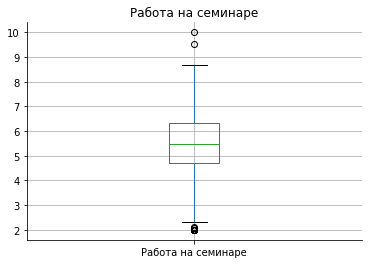

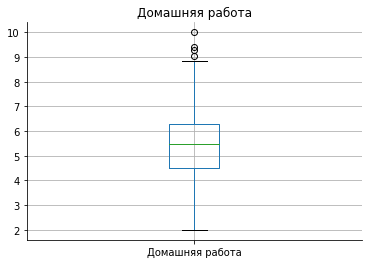

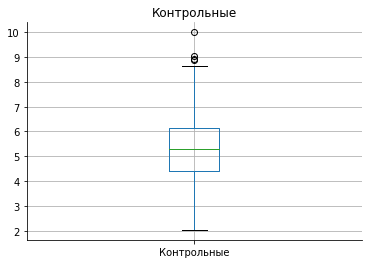

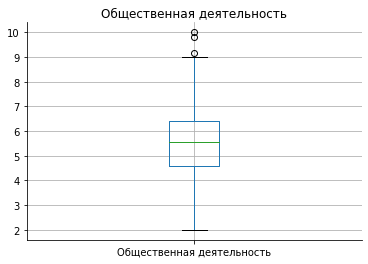

In [12]:
df['Работа на семинаре'].plot(kind='box',
                              title='Работа на семинаре', grid=True)
plt.show()

df['Домашняя работа'].plot(kind='box',
                           title='Домашняя работа', grid=True)
plt.show()

df['Контрольные'].plot(kind='box',
                       title='Контрольные', grid=True)
plt.show()

df['Общественная деятельность'].plot(kind='box',
                                     title='Общественная деятельность', grid=True)
plt.show()

Построим модель линейной регрессии после заполнения пропусков данных

In [13]:
X, y = df[['Работа на семинаре','Домашняя работа','Контрольные','Общественная деятельность']], df['Итоговая оценка']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
model = LinearRegression()

# обучаем на части датасета (train)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [16]:
y_pred = model.predict(X_test)   # прогнозные данные модели

In [17]:
# сравним пронозы, построенные моделью, с фактом
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,Работа на семинаре,Домашняя работа,Контрольные,Общественная деятельность,y_pred,y_test
521,5.985097,6.106306,7.490408,6.129092,6.325171,6.499881
737,4.297347,4.515539,5.620124,4.449126,4.917641,4.787267
740,6.797799,7.106771,5.823906,6.669370,6.573219,6.595030
660,4.710011,4.674423,4.993198,5.123526,5.068635,4.787218
411,6.628246,7.175564,5.781304,6.238638,6.464709,6.545611
...,...,...,...,...,...,...
468,6.707180,6.520471,5.470313,7.153146,6.436697,6.254901
935,4.596810,4.682197,5.482081,4.879672,5.083108,4.904297
428,4.234178,4.347618,4.166135,4.510445,4.624967,4.250902
7,6.646135,6.175734,5.188106,7.421491,6.339000,6.028805


In [18]:
model.score(X_test, y_test) # Оценка точности модели

0.8893970341069491

In [19]:
import seaborn as sns

Посмотрим, как связаны между собой различные признаки в наборе данных

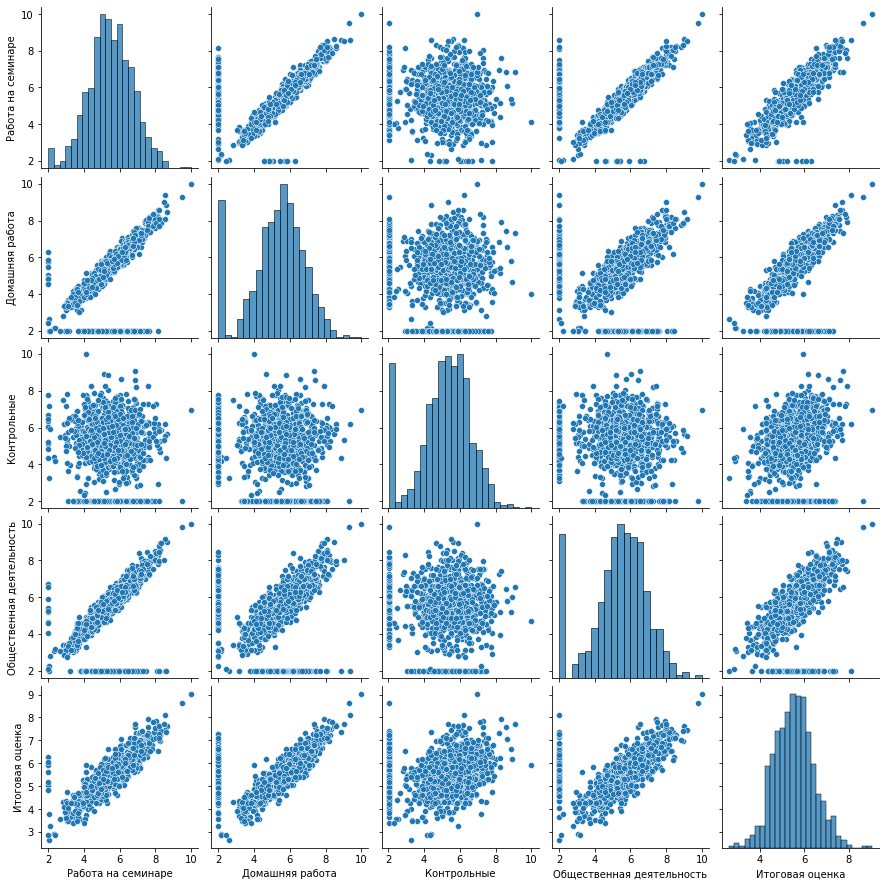

In [20]:
sns.pairplot(df)

<AxesSubplot:>

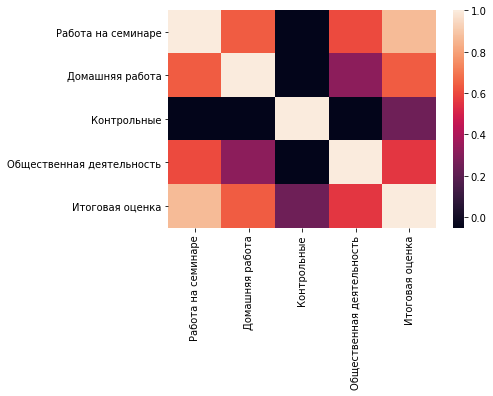

In [21]:
sns.heatmap(df.corr())

Рассмотрим  признак 'Общественная деятельность'. Проверим предположении, что он не влияет на "Итоговую оценку".

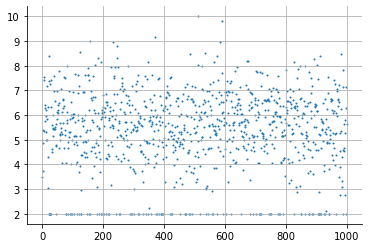

In [22]:
plt.scatter(df.index, df['Общественная деятельность'], s=1)
plt.grid()

Уберем "Общественную деятельность", как не влияющую на итоговую оценку. 

Построим теперь модель линейной регрессии 

In [23]:
X1, y1 = df[['Работа на семинаре','Домашняя работа','Контрольные']], df['Итоговая оценка']

In [24]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [25]:
model1 = LinearRegression()

# обучаем на части датасета (train)
model1.fit(X1_train, y1_train)
predictions = model1.predict(X1_test)

In [26]:
y1_pred = model1.predict(X1_test)   # прогнозные данные модели

In [27]:
# сравним пронозы, построенные моделью, с фактом
res1_df = X1_test.copy()

res1_df['y1_pred'] = y1_pred
res1_df['y1_test'] = y1_test
res1_df

,Работа на семинаре,Домашняя работа,Контрольные,y1_pred,y1_test
521,5.985097,6.106306,7.490408,6.293545,6.499881
737,4.297347,4.515539,5.620124,4.915926,4.787267
740,6.797799,7.106771,5.823906,6.546398,6.595030
660,4.710011,4.674423,4.993198,5.047997,4.787218
411,6.628246,7.175564,5.781304,6.454300,6.545611
...,...,...,...,...,...
468,6.707180,6.520471,5.470313,6.381974,6.254901
935,4.596810,4.682197,5.482081,5.070103,4.904297
428,4.234178,4.347618,4.166135,4.620657,4.250902
7,6.646135,6.175734,5.188106,6.268578,6.028805


In [28]:
model1.score(X1_test, y1_test) # Оценка точности модели

0.8912007178123363

Видим, что  удаления признака улучшило точность модели с 0.8894 до 0.8912

Возьмем наши исходные данные до удаления столбца и добавим к ним столбец со следующими весами оценок: работа на семинаре *0,2; домашняя работа *0,2; контрольная * 0.5; общественная деятельность *0,1

In [29]:
df['Работа на семинаре вес'] = df.apply(lambda x: x['Работа на семинаре']*0.2, axis=1)
df['Домашняя работа вес'] = df.apply(lambda x: x['Домашняя работа']*0.2, axis=1)
df['Контрольные вес'] = df.apply(lambda x: x['Контрольные']*0.5, axis=1)
df['Общественная деятельность вес'] = df.apply(lambda x: x['Общественная деятельность']*0.1, axis=1)

In [30]:
df.head(15)

,Работа на семинаре,Домашняя работа,Контрольные,Общественная деятельность,Итоговая оценка,Работа на семинаре вес,Домашняя работа вес,Контрольные вес,Общественная деятельность вес
0,5.114704,5.514499,4.071828,5.000789,4.920756,1.022941,1.102900,2.035914,0.500079
1,3.735170,2.000000,4.477739,3.474585,4.175030,0.747034,0.400000,2.238870,0.347458
2,5.225310,5.839166,6.155710,4.858306,5.724735,1.045062,1.167833,3.077855,0.485831
3,3.788223,4.206488,6.113006,3.746607,4.660959,0.757645,0.841298,3.056503,0.374661
4,5.347974,5.574410,5.716551,5.416279,5.540190,1.069595,1.114882,2.858276,0.541628
5,7.618362,7.820959,5.432551,7.554012,6.998187,1.523672,1.564192,2.716275,0.755401
6,5.473330,5.844949,5.948451,5.366433,5.747923,1.094666,1.168990,2.974226,0.536643
7,6.646135,6.175734,5.188106,7.421491,6.028805,1.329227,1.235147,2.594053,0.742149
8,5.999409,5.884058,5.705062,6.413473,5.867926,1.199882,1.176812,2.852531,0.641347
9,5.882312,6.230707,5.503700,5.773212,5.880255,1.176462,1.246141,2.751850,0.577321


Построим теперь модель линейной регрессии по обновленному датасету

In [36]:
X2, y2 = df[['Работа на семинаре','Домашняя работа','Контрольные','Общественная деятельность','Работа на семинаре вес','Домашняя работа вес','Контрольные вес','Общественная деятельность вес']], df['Итоговая оценка']

In [37]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [38]:
model2 = LinearRegression()

# обучаем на части датасета (train)
model2.fit(X2_train, y2_train)
predictions = model2.predict(X2_test)

In [39]:
y2_pred = model2.predict(X2_test)

In [40]:
model2.score(X2_test, y2_test) # Оценка точности модели

0.8893970341069491